In [ ]:
import pandas as pd
import numpy as np
from math import pi
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/Bitcoin_Data.csv")

In [ ]:
styled_df = df.head(6).style.set_table_styles(
    [{'selector': 'thead', 'props': [('background-color', 'black'), ('color', 'white'), ('font-weight', 'bold')]},
     {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'lightgray')]},
     {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', 'white')]}]
).set_properties(**{'text-align': 'center', 'border': '1px solid black'})

styled_df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.390000,4.390000,4.390000,4.390000,0.455581,2.000000,4.390000
1,1325317980,nan,nan,nan,nan,nan,nan,nan
2,1325318040,nan,nan,nan,nan,nan,nan,nan
3,1325318100,nan,nan,nan,nan,nan,nan,nan
4,1325318160,nan,nan,nan,nan,nan,nan,nan
5,1325318220,nan,nan,nan,nan,nan,nan,nan


In [ ]:
df.shape

(4857377, 8)

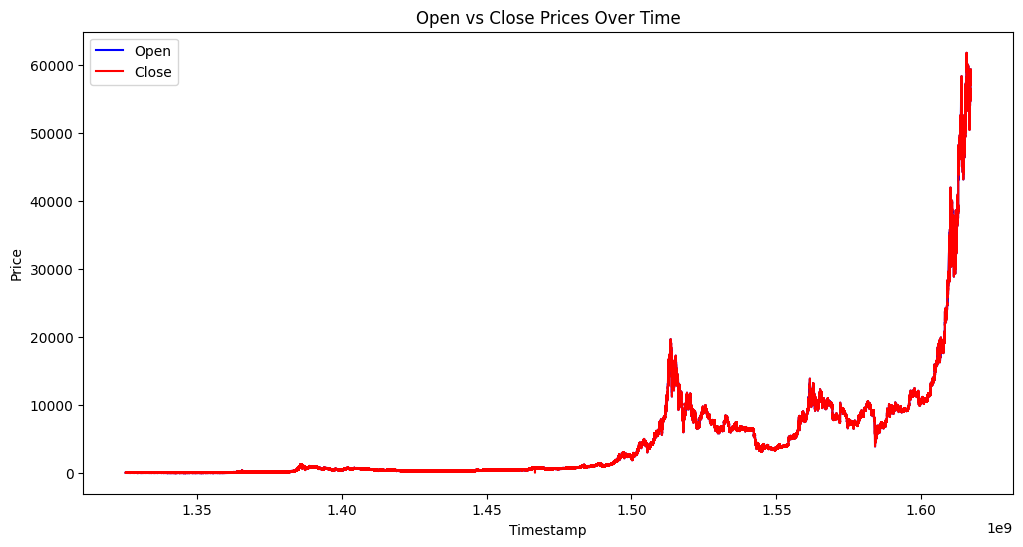

In [ ]:
# Distribution of 'Open' and 'Close' prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Open'], label='Open', color='blue')
plt.plot(df['Timestamp'], df['Close'], label='Close', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Open vs Close Prices Over Time')
plt.legend()
plt.show()

<Axes: title={'center': 'Distribution of Transaction Time'}, ylabel='Density'>

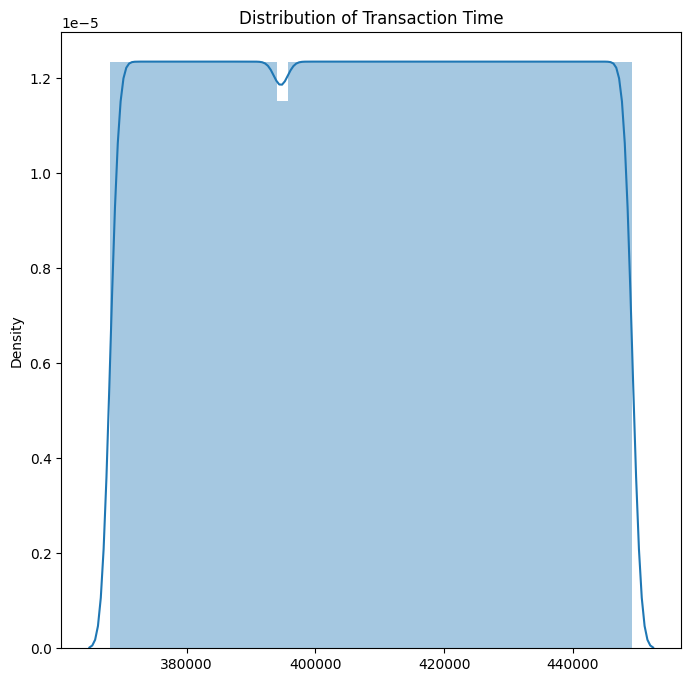

In [ ]:
plt.figure(figsize=(8,8))

plt.title('Distribution of Transaction Time')
sns.distplot(df['Timestamp'].values/(60*60))

In [ ]:
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   Timestamp      Open      High       Low     Close  \
Timestamp           1.000000  0.650719  0.650644  0.650803  0.650714   
Open                0.650719  1.000000  0.999999  0.999999  0.999999   
High                0.650644  0.999999  1.000000  0.999998  0.999999   
Low                 0.650803  0.999999  0.999998  1.000000  0.999999   
Close               0.650714  0.999999  0.999999  0.999999  1.000000   
Volume_(BTC)       -0.103926 -0.051860 -0.051717 -0.052040 -0.051877   
Volume_(Currency)   0.228190  0.344074  0.344498  0.343541  0.344036   
Weighted_Price      0.650737  0.999999  0.999999  1.000000  1.000000   

                   Volume_(BTC)  Volume_(Currency)  Weighted_Price  
Timestamp             -0.103926           0.228190        0.650737  
Open                  -0.051860           0.344074        0.999999  
High                  -0.051717           0.344498        0.999999  
Low                   -0.052040           0.343541     

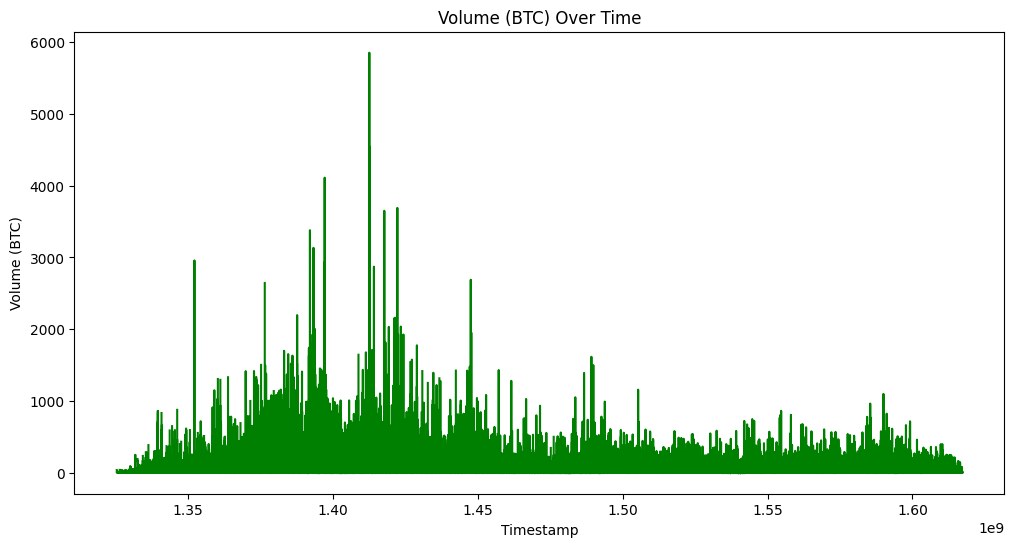

In [ ]:
# Volume (BTC) over time
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Volume_(BTC)'], color='green')
plt.xlabel('Timestamp')
plt.ylabel('Volume (BTC)')
plt.title('Volume (BTC) Over Time')
plt.show()

<Axes: ylabel='count'>

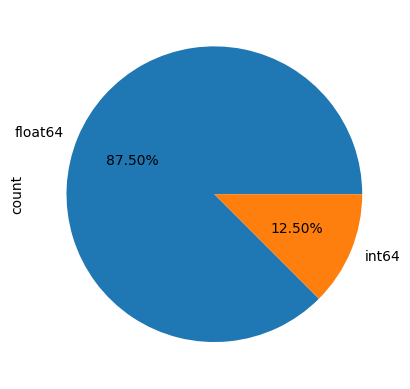

In [ ]:
df.dtypes.value_counts().plot.pie(autopct=('%0.2f%%'))

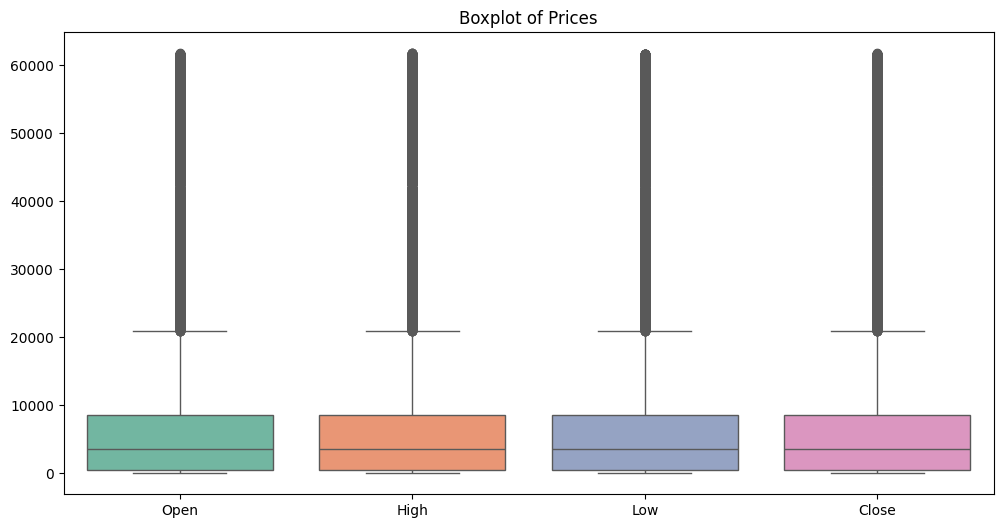

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']], palette='Set2')
plt.title('Boxplot of Prices')
plt.show()

In [ ]:
unique_values = df.nunique()
print("Unique Values:")
print(unique_values)

Unique Values:
Timestamp            4857377
Open                 1059732
High                 1030826
Low                  1046536
Close                1058685
Volume_(BTC)         3181865
Volume_(Currency)    3562603
Weighted_Price       3046022
dtype: int64


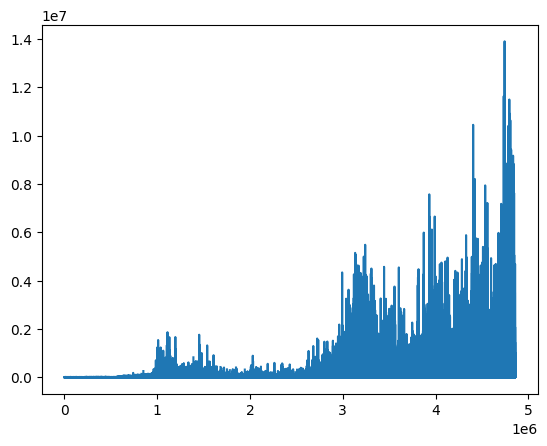

In [ ]:
plt.plot(df["Volume_(Currency)"])
plt.show()

<Axes: >

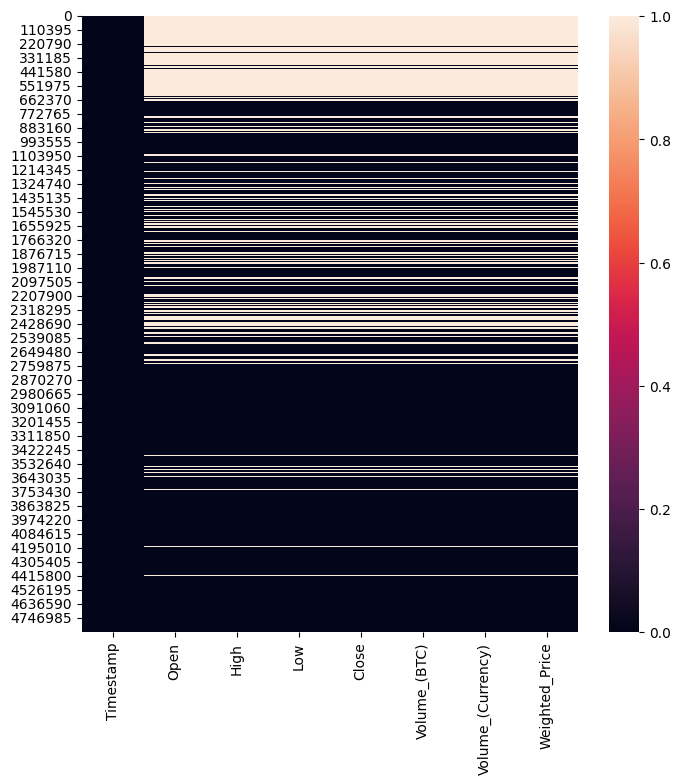

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64


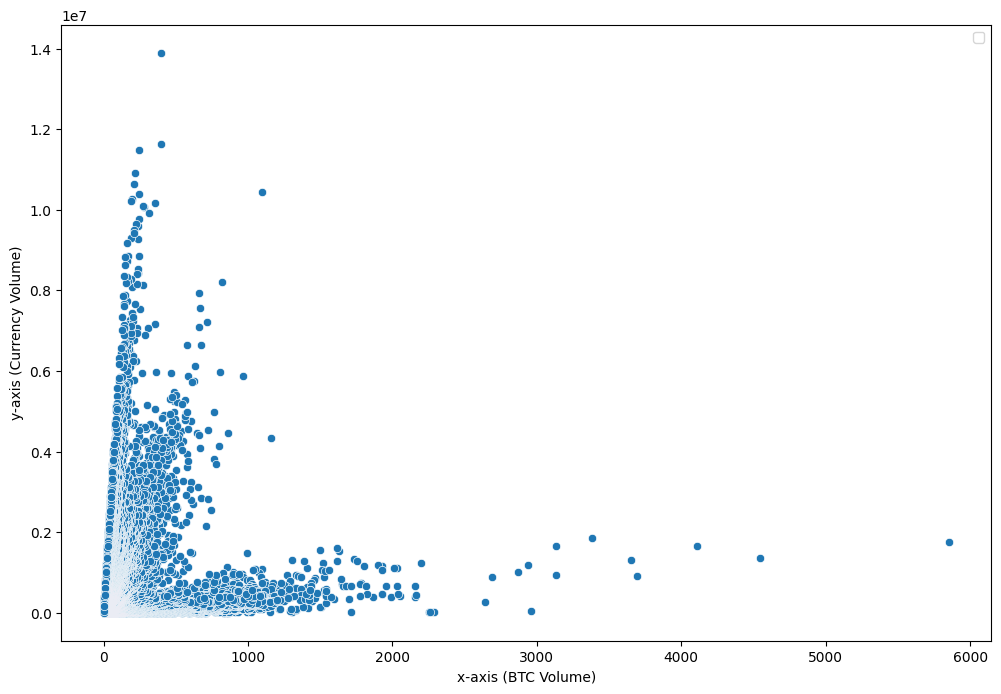

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Volume_(BTC)', y='Volume_(Currency)', data=df)
plt.xlabel("x-axis (BTC Volume)")
plt.ylabel("y-axis (Currency Volume)")
plt.legend()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


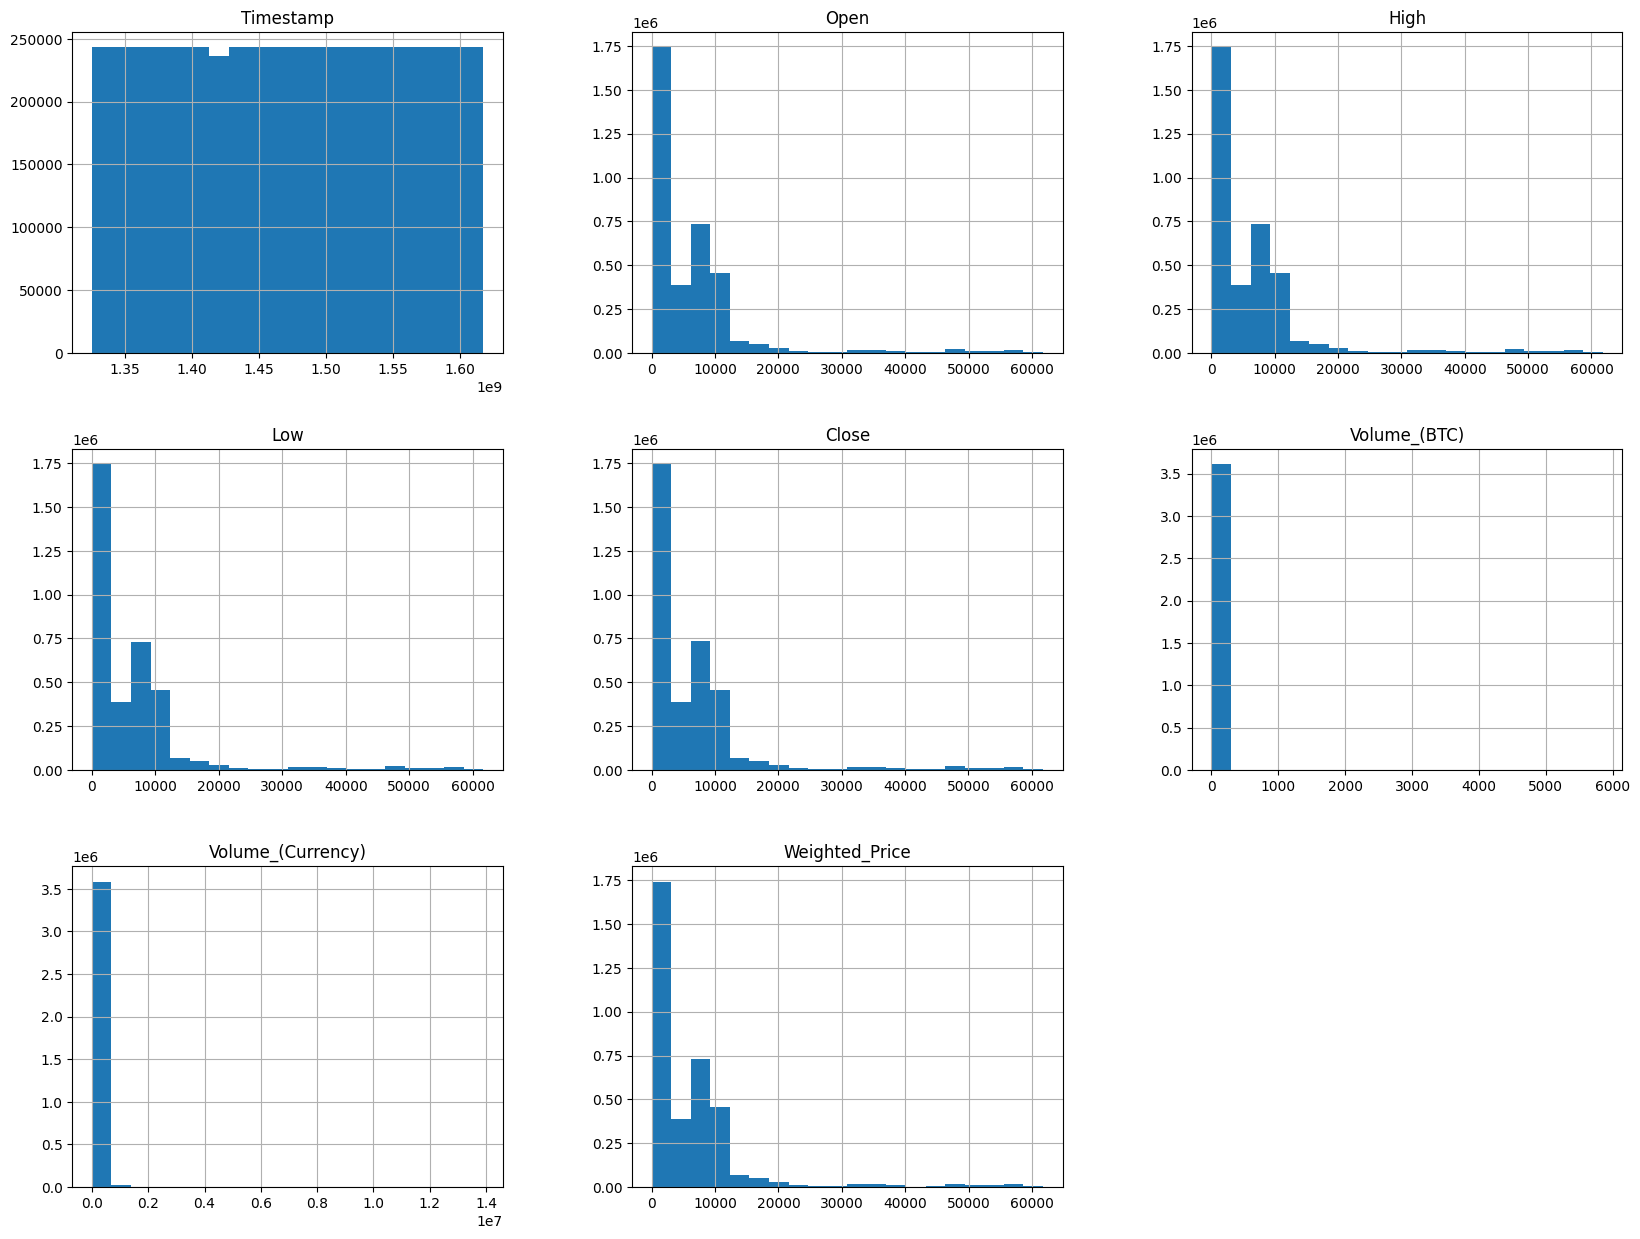

In [ ]:
df.hist(bins=20, legend=False, figsize=(20, 15))
plt.show()

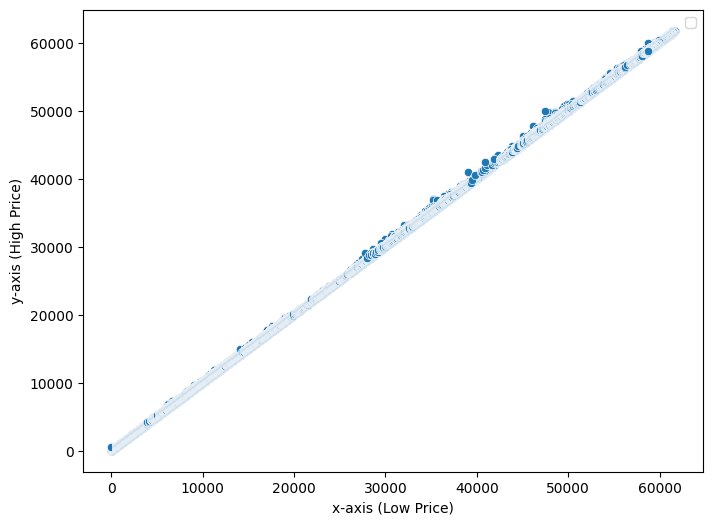

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Low', y='High', data=df)
plt.xlabel("x-axis (Low Price)")
plt.ylabel("y-axis (High Price)")
plt.legend()
plt.show()

In [ ]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [ ]:
df = df.dropna()
df = df.drop_duplicates()

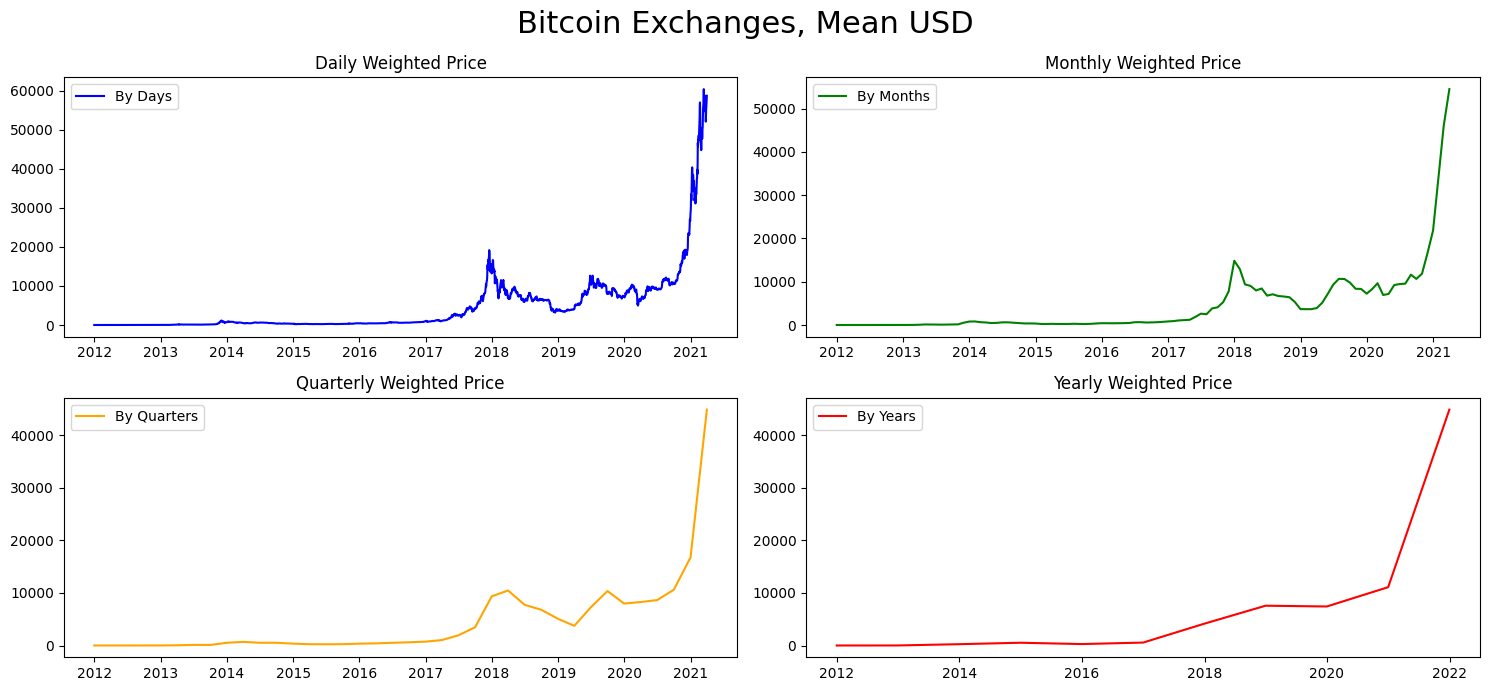

In [ ]:
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')

df.index = df.Timestamp

df_day = df.resample('D').mean()

df_month = df.resample('M').mean()

df_year = df.resample('A-DEC').mean()

df_Q = df.resample('Q-DEC').mean()

# Create a figure for the subplots
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin Exchanges, Mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df_day.index, df_day['Weighted_Price'], '-', label='By Days', color='blue')
plt.legend(loc='best')
plt.title('Daily Weighted Price')

plt.subplot(222)
plt.plot(df_month.index, df_month['Weighted_Price'], '-', label='By Months', color='green')
plt.legend(loc='best')
plt.title('Monthly Weighted Price')

plt.subplot(223)
plt.plot(df_Q.index, df_Q['Weighted_Price'], '-', label='By Quarters', color='orange')
plt.legend(loc='best')
plt.title('Quarterly Weighted Price')

plt.subplot(224)
plt.plot(df_year.index, df_year['Weighted_Price'], '-', label='By Years', color='red')
plt.legend(loc='best')
plt.title('Yearly Weighted Price')

plt.tight_layout()
plt.show()

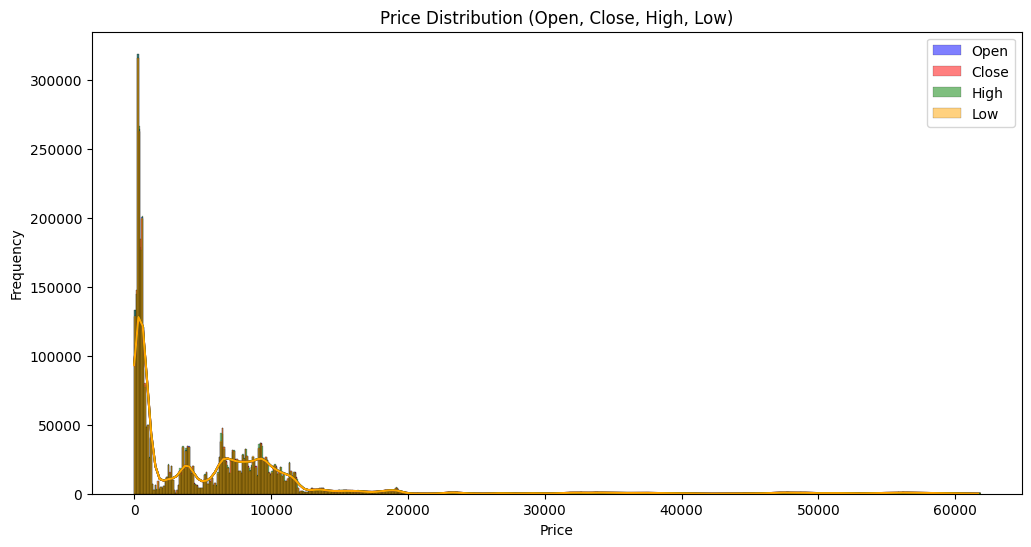

In [ ]:
# Price Distribution of 'Open', 'Close', 'High', 'Low'
plt.figure(figsize=(12, 6))
sns.histplot(df['Open'], kde=True, label='Open', color='blue')
sns.histplot(df['Close'], kde=True, label='Close', color='red')
sns.histplot(df['High'], kde=True, label='High', color='green')
sns.histplot(df['Low'], kde=True, label='Low', color='orange')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution (Open, Close, High, Low)')
plt.legend()
plt.show()

Dickey–Fuller test: p=0.998833


<Figure size 1500x700 with 0 Axes>

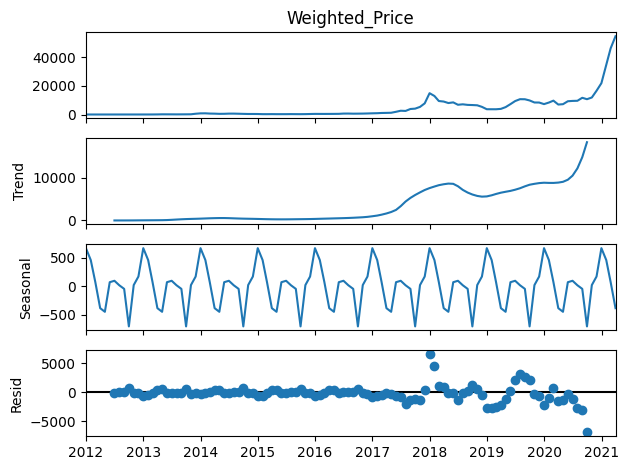

In [ ]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df_month.Weighted_Price).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])
plt.show()

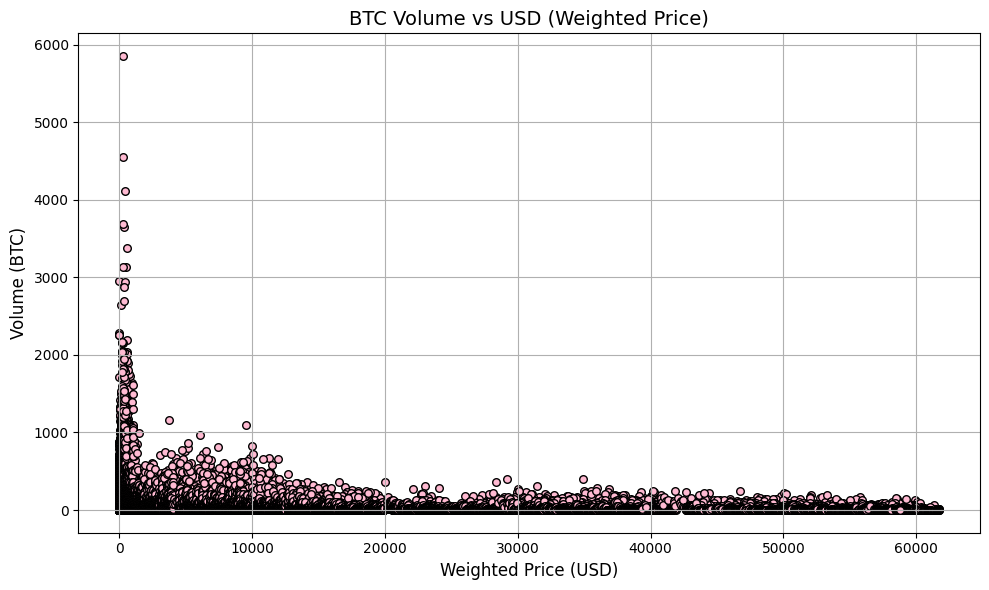

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for BTC Volume vs Weighted Price (USD)
ax.scatter(
    df['Weighted_Price'].astype(float),
    df['Volume_(BTC)'].astype(float),
    color='#FFBAD2',
    edgecolors='black',
    s=30,
)

# Set title and labels
ax.set_title('BTC Volume vs USD (Weighted Price)', fontsize=14)
ax.set_xlabel('Weighted Price (USD)', fontsize=12)
ax.set_ylabel('Volume (BTC)', fontsize=12)

ax.grid(True)

plt.tight_layout()
plt.show()